In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 

## 1.1Fitting the model to the data 

In [2]:
# Loading  a dataset for classification Problem

heart_diesase = pd.read_csv("https://docs.google.com/spreadsheets/d/1Cm_sP6krAIxTbg-G3JWavWUcQyed3IITbFbttlXIh9k/export?gid=1886998129&format=csv")
heart_diesase.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Now trying with Random Forest Classifier model for classification
from sklearn.ensemble import RandomForestClassifier

np.random.seed(14)

# Creating feature and Lables
X = heart_diesase.drop("target", axis=1)
Y = heart_diesase["target"]

# Split Data into train and test samples
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=14)

# Initiate the model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)

# Evaluate the model
clf.score(X_test, Y_test)

0.7540983606557377

## 1.2 Make Predictions using a ML Model

* `predict()`
* `predict_proba()`

In [4]:
# use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [5]:
Y_test

240    0
117    1
175    0
274    0
254    0
      ..
130    1
116    1
8      1
3      1
194    0
Name: target, Length: 61, dtype: int64

In [6]:
# Compare the prediction with the truth values to evalute the models 
y_pred  = clf.predict(X_test)
np.mean(y_pred == Y_test)

0.7540983606557377

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.7540983606557377

Make prediction with `predict_proba()`

In [8]:
# preict_proba() returns probability of the classification models
clf.predict_proba(X_test[:5])

array([[0.88, 0.12],
       [0.38, 0.62],
       [0.79, 0.21],
       [0.75, 0.25],
       [0.28, 0.72]])

`predict` can be used in regression problems

In [9]:
# Get California Housing Dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["MedHouseVal"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [10]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(40)

# Data Preparation
X = housing_df.drop("MedHouseVal", axis=1)
Y = housing_df["MedHouseVal"]

# Spliting the Data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Model Creation
model = RandomForestRegressor(n_estimators=100)

# Train the model
model.fit(X_train, Y_train)

# Predits the test values
y_preds = model.predict(X_test)
y_preds

array([1.92919  , 2.29528  , 0.7784598, ..., 1.9455   , 1.99384  ,
       0.98725  ])

In [11]:
y_preds[:10]

array([1.92919  , 2.29528  , 0.7784598, 1.98394  , 1.47942  , 1.52489  ,
       3.4511201, 1.28298  , 3.37867  , 3.3638801])

In [12]:
np.array(Y_test)

array([2.265, 1.962, 1.458, ..., 1.815, 1.832, 0.822])

In [13]:
# Comparing the values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, y_preds)

0.34112369198158937

In [14]:
model.score(X_test, Y_test)

0.8006317374189605

## 2. Evaluating a Machine Learning Model

Three ways of evaluating the models:

* Build in `Score` Method
* The `Scoring` Parameters
* Problem specific metric functons

### 2.1 Evaluating with `Score` Method

In [15]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(40)

# Creating feature and Lables
X = heart_diesase.drop("target", axis=1)
Y = heart_diesase["target"]

# Split Data into train and test samples
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=14)

# Initiate the model
clf = RandomForestClassifier(n_estimators=100)

# Fit the model
clf.fit(X_train, Y_train)


RandomForestClassifier()

In [16]:
clf.score(X_train, Y_train)

1.0

In [17]:
clf.score(X_test, Y_test)

0.7377049180327869

`score()` method for Regression Problems

In [43]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(14)

# Data Preparation
X = housing_df.drop("MedHouseVal", axis=1)
Y = housing_df["MedHouseVal"]

# Spliting the Data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Model Creation
model = RandomForestRegressor(n_estimators=1000)

# Train the model
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000)

In [44]:
model.score(X_train, Y_train)

0.9745241568967612

In [70]:
model.score(X_test, Y_test)

0.8166731573368636

In [71]:
Y_preds = model.predict(X_test)
Y_preds

array([1.581898  , 2.62903803, 1.040076  , ..., 2.55591132, 0.96016687,
       1.776958  ])

## 2.2 Evaluating models using `scoring` parameters
1. Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(45)

# Creating feature and Lables
X = heart_diesase.drop("target", axis=1)
Y = heart_diesase["target"]

# Split Data into train and test samples
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=14)

# Initiate the model
clf = RandomForestClassifier(n_estimators=100)

# Fit the model
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [26]:
clf.score(X_test, Y_test)

0.7704918032786885

In [27]:
cross_val_score(clf, X, Y)

array([0.85245902, 0.90163934, 0.81967213, 0.8       , 0.76666667])

In [28]:
np.random.seed(50)

clf_single_score = clf.score(X_test, Y_test)

clf_cross_val_score = np.mean(cross_val_score(clf, X, Y, scoring=None))

clf_single_score, clf_cross_val_score

(0.7704918032786885, 0.8281967213114754)

## 2.3 Classification Model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report

**Accuracy**

In [72]:
np.random.seed(45)

# Creating feature and Lables
X = heart_diesase.drop("target", axis=1)
Y = heart_diesase["target"]

# Split Data into train and test samples
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=14)

# Initiate the model
clf = RandomForestClassifier(n_estimators=100)

# Fit the model
clf.fit(X_train, Y_train)

# cross validation
cross_validate_score = cross_val_score(clf, X, Y)

In [73]:
np.mean(cross_validate_score)

0.828087431693989

In [74]:
print(f"Heart Disease classification cross validation accuracy: {np.mean(cross_validate_score)*100:.2f}%")

Heart Disease classification cross validation accuracy: 82.81%


**Area under Receiver operating characteristic curve (AOC/ROC)**

ROC curve is the comparison of models True positive rate(TPR) vs False positive rate(FPR)

* True positive = predition is true and actual value is true
* False positive = predition is true and actual value is false
* True Negative = predition is false and actual value is false
* False Negative = predition is false and actual value is true

In [77]:
from sklearn.metrics import roc_curve

# Make Predictions 
Y_preds = clf.predict_proba(X_test)

Y_preds[:10]

array([[0.84, 0.16],
       [0.33, 0.67],
       [0.84, 0.16],
       [0.75, 0.25],
       [0.24, 0.76],
       [0.22, 0.78],
       [0.39, 0.61],
       [0.16, 0.84],
       [0.84, 0.16],
       [0.52, 0.48]])

In [81]:
Y_preds_positive = Y_preds[: , 1]
Y_preds_positive[:10]

array([0.16, 0.67, 0.16, 0.25, 0.76, 0.78, 0.61, 0.84, 0.16, 0.48])

In [82]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_preds_positive)

In [86]:
# create function to plot ROC
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red')
    plt.plot([0,1], [0,1], color='darkblue', linestyle = '--', label="Guessing")
    
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate(TPR)")
    plt.title("Receiver operating characteristic curve (ROC)")
    plt.legend()
    plt.show()

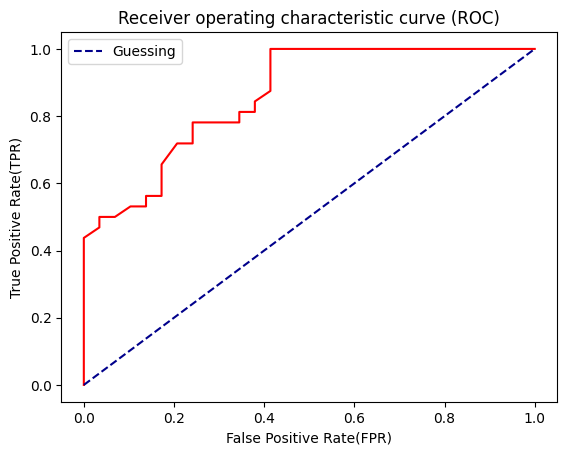

In [87]:
plot_roc_curve(fpr, tpr)

In [88]:
# AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_preds_positive)

0.8615301724137931

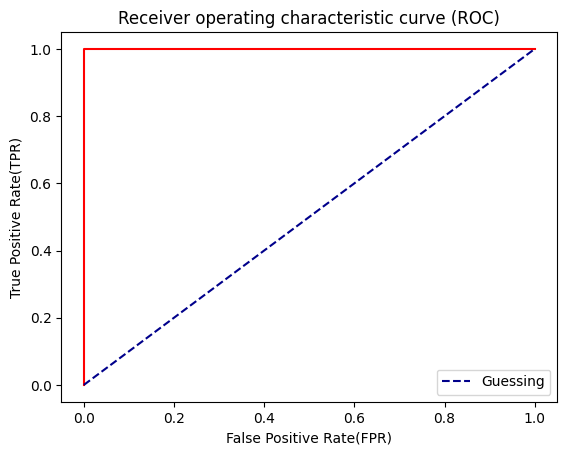

In [90]:
# For the perfect ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_test)
plot_roc_curve(fpr, tpr)